# Exercise: Learning Rate

Learning Rate is the hyperparameter that controls by how much an algorithm updates the weights of a model at each iteration.

Furthermore, it also affects how quickly a model *converges*, or reaches the lowest cost/minimal loss.

Generally, a small value will make a model take longer to converge, whereas very high values might make it impossible for the optimal weights to be calculated.

In this Unit we will make an experiment where we try different Learning Rate values and see what works best and if the choices affect other metrics.

## Preparing data
We will use a fictional investment banking dataset, that correlates the amount of money accrued according to the age of accounts.



In [52]:
# Import everything we will need for this unit
import pandas as pd
import numpy as np
import operator
import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import PolynomialLinearRegression as plr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


# Load data from our dataset file into a pandas dataframe
dataset = pd.read_csv('Data/investments_extended.csv', index_col=False, sep=",",header=0)

# Check what's in the dataset
print(dataset.head())




                             Account ID  Account Age  Total Accrued
0  6310fbab-6dfc-49b6-9215-40e01024d00a           18           3153
1  09e0b4d7-8dc5-4c49-9e05-d408ec95319b           44          32194
2  39b0e668-a610-4bc1-b94c-5338b8757481           19           2806
3  ad776e01-c8f6-4332-ba61-40c50297e687           20           2073
4  959434e5-4e07-47d1-a61b-6b4978cc5f42           35          12938


## Model 0: High Learning Rate

Below we train our Polynomial Linear Regression model using a very high Learning Rate and display the resulting metrics.

We save the history of cost for each iteration (J_history_0) so we can plot comparisons later:


In [53]:
# Define feature matrix and label vector
X = dataset["Account Age"].values.reshape(-1,1)
y = dataset["Total Accrued"].values

# Initialize and train model with a very high Learning Rate
# setting values for learning rate and number of iterations
custom_model_0 = plr.PolynomialLinearRegression()
weights_0, J_history_0 = custom_model_0.fit(X, y, learning_rate=0.715, num_iters=500)

# Generate predictions
y_hat = custom_model_0.predict(X)

# Calculate metrics
rmse_0 = np.sqrt(mean_squared_error(y,y_hat))
r2_0 = r2_score(y,y_hat)

print(f"RMSE metrics: {rmse_0}")
print(f"R2 metrics: {r2_0}")


RMSE metrics: 7354.236336115239
R2 metrics: 0.6269587126576106


## Model 1: Low Learning Rate
Train another model with a very low Learning Rate, but keeping the same number of iterations.

In [54]:
# use a very low Learning Rate

custom_model_1 = plr.PolynomialLinearRegression()
weights_1, J_history_1 = custom_model_1.fit(X, y, learning_rate=0.005, num_iters=500)

# Generate predictions based on original dataset
y_hat_1 = custom_model_1.predict(X)

# Calculate metrics
rmse_1 = np.sqrt(mean_squared_error(y,y_hat_1))
r2_1 = r2_score(y,y_hat_1)

print(f"RMSE metrics: {rmse_1}")
print(f"R2 metrics: {r2_1}")

RMSE metrics: 2452.2289840760704
R2 metrics: 0.9585233397552808


## Model 2: Optimal Learning Rate
Finally, train a model with a sensible Learning Rate that is not too high or too low.

In [55]:
# Try an optimal Learning Rate
custom_model_2 = plr.PolynomialLinearRegression()
weights_2, J_history_2 = custom_model_2.fit(X, y, learning_rate=0.01, num_iters=500)

# Generate predictions based on original dataset
y_hat_2 = custom_model_2.predict(X)

# Calculate metrics
rmse_2 = np.sqrt(mean_squared_error(y,y_hat_2))
r2_2 = r2_score(y,y_hat_2)

print(f"RMSE metrics: {rmse_2}")
print(f"R2 metrics: {r2_2}")

RMSE metrics: 1986.4936757936325
R2 metrics: 0.9727820062393784


### Metrics Comparison
In a comparison between the above models, the one with the optimized Learning Rate clearly displays the best metrics:

In [56]:
# Use a dataframe to create a comparison table of metrics
l = [["High LR", rmse_0, r2_0],
    ["Low LR", rmse_1, r2_1],
    ["Optimal LR", rmse_2, r2_2]]

pd.DataFrame(l, columns=["", "RMSE", "R2"])

,,RMSE,R2
0,High LR,7354.236336,0.626959
1,Low LR,2452.228984,0.958523
2,Optimal LR,1986.493676,0.972782


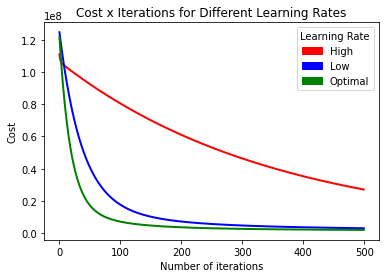

In [57]:
# Plot Cost x Number of Iterations for each LR

fig = plt.figure()
axes = fig.add_subplot()
axes.set_title('Cost x Iterations for Different Learning Rates')

l0 = plt.plot(np.arange(len(J_history_0)), J_history_0, lw=2, color="red")
l1 = plt.plot(np.arange(len(J_history_1)), J_history_1, lw=2, color="blue")
l2 = plt.plot(np.arange(len(J_history_2)), J_history_2, lw=2, color="green")

# Add legend
red_patch = mpatches.Patch(color="red", label="High")
blue_patch = mpatches.Patch(color="blue", label="Low")
green_patch = mpatches.Patch(color="green", label="Optimal")
plt.legend(title = "Learning Rate", handles=[red_patch, blue_patch, green_patch])
plt.xlabel("Number of iterations")
_ = plt.ylabel("Cost")


The plot above shows that the model using the optimal Learing Rate converges faster than the other two, requiring less iterations to minimise the cost.
Although the model with the low Learning Rate comes close, it would still need more iterations to reach better metrics.



## Summary

In this exercise we defined the Learning Rate hyperparameter and briefly talked about its effect on training time and metrics.

We showed that a very high value can stop the model from finding the optimal weights, and that a low value can make it require unnecessary iterations, extending the training time.

Finally, we showed that a sensible value can yield the best metrics, and that you can plot comparisons to gain an intuition on what works best.